# Removal continuum

In [301]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy import units as u
from astropy.wcs import WCS
from astropy import constants as const
from spectral_cube import SpectralCube

# Define the filenames of the two data cubes


file = 'C:/Users/macka/OneDrive/Documentos/Master/PYTHON_CODES/RESULTS/FITS/resampled_cube.fits'  # Replace with the actual filename of the second cube (this case, second cube is the cube with the spectral resolution changed)

# Open the FITS files
cube = SpectralCube.read(file)

print(cube.header)


SIMPLE  =                    T / conforms to FITS standard                      BITPIX  =                  -64 / array data type                                NAXIS   =                    3                                                  NAXIS1  =                  120                                                  NAXIS2  =                  128                                                  NAXIS3  =                  731                                                  BMAJ    =   4.442253420057E-03                                                  BMIN    =   3.226777089219E-03                                                  BPA     =  -8.550686982140E+01                                                  BTYPE   = 'Intensity'                                                           OBJECT  = 'N159-13CII'                                                          BUNIT   = 'Jy beam-1'          / Brightness (pixel) unit                        ALTRVAL =   5.990705566226E+05 /Alternat

In [302]:
# Obtain the essential information from the cubes

UNIT = cube.header['CUNIT3']
RESTFRQ = cube.header['RESTFRQ'] * u.Hz  # Rest frequency in Hz
CRVAL = cube.header['CRVAL3'] * u.km/u.s # Value of the third axis
CRPIX = cube.header['CRPIX3']  # Reference pixel of the third axis
CDELT = cube.header['CDELt3'] * u.km/u.s # Coordinate increment at reference point

print('UNIT in cube:', UNIT)
print('RESTFRQ in cube:', RESTFRQ)
print('CRVAL in cube:', CRVAL)
print('CRPIX in cube:', CRPIX)
print('CRDELT in cube:', CDELT)

UNIT in cube: km s-1
RESTFRQ in cube: 102587476000.0 Hz
CRVAL in cube: -130.0 km / s
CRPIX in cube: 1.0
CRDELT in cube: 1.0 km / s


In [303]:
RESTFRQ = RESTFRQ.to(u.GHz)  # Convert to GHz
print('RESTFRQ:', RESTFRQ)

RESTFRQ: 102.58747600000001 GHz


In [304]:
# Check the number of channels in the cubes
nchan = cube.shape[0]
print('Number of channels in cube:', nchan)

Number of channels in cube: 731


In [305]:
## Necesitamos la velocidad de la luz para la aplicación de la fórmula Doppler
C = const.c.to(u.km / u.s).value * u.km/u.s  # Velocidad de la luz en km/s
print('\nVelocidad de la luz (C):', C)


Velocidad de la luz (C): 299792.458 km / s


In [306]:
# Obtain the velocity axis and frequency axis

index = np.arange(1, nchan + 1 ) # Aggregate (+1) because nchan2 print 1 to 728
VEL = CRVAL + (index - CRPIX) * CDELT #Create the velocity axis

print('Index:', index)
print('---------------------------')
print('Velocity:', VEL)


Index: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 243 244 245

In [307]:
# Create the frequency axis
FREQ = cube.with_spectral_unit(u.Hz, rest_value=RESTFRQ).spectral_axis.to(u.GHz)  # Convert to GHz
print('Frequency:', FREQ)

Frequency: [102.63196135 102.63161915 102.63127696 102.63093476 102.63059257
 102.63025037 102.62990818 102.62956598 102.62922379 102.62888159
 102.6285394  102.6281972  102.62785501 102.62751281 102.62717062
 102.62682842 102.62648623 102.62614403 102.62580184 102.62545964
 102.62511745 102.62477525 102.62443306 102.62409086 102.62374867
 102.62340647 102.62306428 102.62272208 102.62237989 102.62203769
 102.6216955  102.6213533  102.62101111 102.62066891 102.62032672
 102.61998452 102.61964233 102.61930013 102.61895794 102.61861574
 102.61827355 102.61793135 102.61758916 102.61724696 102.61690477
 102.61656257 102.61622038 102.61587818 102.61553599 102.61519379
 102.6148516  102.6145094  102.61416721 102.61382501 102.61348282
 102.61314062 102.61279843 102.61245623 102.61211404 102.61177184
 102.61142965 102.61108745 102.61074526 102.61040306 102.61006087
 102.60971867 102.60937648 102.60903428 102.60869209 102.60834989
 102.6080077  102.6076655  102.60732331 102.60698111 102.60663892

### Define two velocities masks

- range for the first mask: 221 to 250 km/s, that correspond the range of peak emission CF+
- range for the second mask: 338 to 372 km/s, that correspond other peak emission that I dont know the origin

### In this process

I calculate the RMS using a pre-emission velocity range.
The Spectral Resampled cube have 729 (599 km/s) channel, where the emission is between the velocity 221 to 250 km/s.

With the defined range, the integrated intensity curves are obtained, a zero order polynomial is applied and with the residual obtained, the RMS value for each channel is obtained.


In [308]:
# Rango de velocidades para las máscaras (puedes añadir más rangos si lo necesitas)
# Define estas tuplas (vel_min, vel_max) en km/s
mask_ranges_km_s = [(221, 250), (331, 384)]
print('Mask ranges in km/s:', mask_ranges_km_s)

Mask ranges in km/s: [(221, 250), (331, 384)]


#### The model is fitting in the range more or less 4 time the width of the peak.

 - CF+ emission range velocity: 177 to 294 km/s, width of peak is app 11 velocities.
 - Other emission range velocity: 274 to 436 km/s, width of peak is app 16 velocities.

In [309]:
fit_range_km_s = [(177., 294.)] # Rango para el ajuste lineal
#fit_range_km_s = (274, 436) 
print('Fit range in km/s:', fit_range_km_s)

Fit range in km/s: [(177.0, 294.0)]


In [310]:
def create_mask_and_subcube_for_fitting(velocities, intensity_profile, mask_ranges, fit_range):
    """
    Prepara los datos de velocidad e intensidad para el ajuste del continuo.
    Identifica el rango de ajuste, excluye las regiones de línea y maneja los NaNs.

    Parameters:
    - velocities: Eje de velocidad completo (esperado sin NaNs).
    - intensity_profile: Perfil de intensidad para un píxel (puede contener NaNs).
    - mask_ranges: Lista de tuplas (vel_min, vel_max) en km/s para excluir.
    - fit_range: Tupla (vel_min, vel_max) en km/s para el rango de ajuste.

    Returns:
    - velocities_to_fit: Velocidades válidas a usar en el ajuste.
    - intensities_to_fit: Intensidades válidas a usar en el ajuste.
    - velocities_fit_range_all: Velocidades dentro del rango de ajuste (incluye excluidos).
    - intensities_fit_range_all: Intensidades dentro del rango de ajuste (incluye excluidos).
    """
    vel_fit_min, vel_fit_max = fit_range[0] # fit_range is expected as a list containing one tuple

    # 1. Select data within the specified fit_range
    mask_fit_range = (velocities >= vel_fit_min * u.km/u.s) & \
                     (velocities <= vel_fit_max * u.km/u.s)

    velocities_fit_range_all = velocities[mask_fit_range]
    intensities_fit_range_all = intensity_profile[mask_fit_range]

    # 2. Filter out NaNs from the data within the fit_range
    non_nan_mask_in_fit_range = ~np.isnan(intensities_fit_range_all)
    velocities_filtered_for_fit = velocities_fit_range_all[non_nan_mask_in_fit_range]
    intensities_filtered_for_fit = intensities_fit_range_all[non_nan_mask_in_fit_range]

    if len(intensities_filtered_for_fit) == 0:
        # No valid data points in the fit range after NaN filtering
        return np.array([]), np.array([]), np.array([]), np.array([])

    # 3. Create a mask for regions to EXCLUDE from the fit (within the already filtered data)
    full_mask_exclude_from_fit = np.zeros(len(velocities_filtered_for_fit), dtype=bool)
    for v_min, v_max in mask_ranges:
        mask_exclude_current = (velocities_filtered_for_fit >= v_min * u.km/u.s) & \
                               (velocities_filtered_for_fit <= v_max * u.km/u.s)
        full_mask_exclude_from_fit = full_mask_exclude_from_fit | mask_exclude_current

    # 4. The points to INCLUDE in the fit are those that are NOT in the excluded regions
    mask_for_fitting = ~full_mask_exclude_from_fit

    velocities_to_fit = velocities_filtered_for_fit[mask_for_fitting]
    intensities_to_fit = intensities_filtered_for_fit[mask_for_fitting]

    return velocities_to_fit, intensities_to_fit, velocities_fit_range_all, intensities_fit_range_all


### Generate the continuum substraction

In [330]:
order = 1  # Puedes cambiar el orden del polinomio aquí

In [312]:
# Initialize a new NumPy array to store the continuum-subtracted data
# It will have the same shape as the original cube and be filled with NaNs initially.
continuum_subtracted_data = np.full(cube.shape, np.nan, dtype=np.float32)

In [313]:
# Get spatial dimensions (Y, X)
ny, nx = cube.shape[1], cube.shape[2]

In [314]:
# Initialize an array to store RMS values from the continuum-only regions for each pixel
# This will be used for the global RMS map and histogram
rms_map_continuum_only = np.full((ny, nx), np.nan, dtype=np.float32)

In [331]:
from tqdm import tqdm
# Iterate through all (y, x) spatial coordinates
# Using tqdm for a progress bar to show processing status
for y in tqdm(range(ny), desc="Procesando filas (Y)"):
    for x in range(nx):
        # Extract the intensity (spectrum) for the current pixel
        intensity_pixel = cube[:, y, x].value

        # Prepare data for fitting, handling NaNs and exclusion masks
        velocities_to_fit, intensities_to_fit, _, _ = \
            create_mask_and_subcube_for_fitting(VEL, intensity_pixel, mask_ranges_km_s, fit_range_km_s)

        # Check if there are enough valid points to perform the polynomial fit
        # A polynomial of degree 'd' requires at least 'd+1' points.
        if intensities_to_fit.size > order:
            try:
                # Perform the polynomial fit
                poly_coeff = np.polyfit(velocities_to_fit.value, intensities_to_fit, deg=order)

                # Evaluate the fitted continuum line over the *entire* velocity axis
                # This continuum will be subtracted from the full original spectrum
                fitted_line_full = np.polyval(poly_coeff, VEL.value)

                # Calculate the residuals (continuum-subtracted spectrum)
                # Initialize residuals with NaNs. Only subtract where original data is not NaN.
                residuals_full_spectrum = np.full_like(intensity_pixel, np.nan)
                
                # Create a mask for non-NaN points in the original intensity profile
                non_nan_original_mask = ~np.isnan(intensity_pixel)
                
                # Perform subtraction only for original non-NaN data points
                residuals_full_spectrum[non_nan_original_mask] = \
                    intensity_pixel[non_nan_original_mask] - fitted_line_full[non_nan_original_mask]
                
                # Store the continuum-subtracted spectrum in the new data cube array
                continuum_subtracted_data[:, y, x] = residuals_full_spectrum

                # Calculate RMS from the residuals *only from the points used for fitting* (continuum-only)
                residuals_fitted_points_current = intensities_to_fit - np.polyval(poly_coeff, velocities_to_fit.value)
                if residuals_fitted_points_current.size > 0:
                    rms_map_continuum_only[y, x] = np.sqrt(np.mean(residuals_fitted_points_current**2))


            except np.linalg.LinAlgError:
                # Catch potential errors during polynomial fitting (e.g., singular matrix)
                # If an error occurs, the pixel's data in the new cube will remain NaN (as initialized)
                # print(f"Advertencia: No se pudo ajustar el polinomio en el píxel ({x}, {y}) debido a un error de álgebra lineal. Dejando NaN.")
                pass
            except ValueError as e:
                # Catch other potential ValueErrors during fitting
                # print(f"Advertencia: No se pudo ajustar el polinomio en el píxel ({x}, {y}) debido a un ValueError: {e}. Dejando NaN.")
                pass
        else:
            # If there are too few points for a valid fit, the pixel's data remains NaN
            # print(f"Advertencia: Demasiados pocos puntos válidos para el ajuste en el píxel ({x}, {y}). Dejando NaN.")
            pass


print("\nProceso de sustracción de continuo completado para todos los píxeles.")

Procesando filas (Y): 100%|██████████| 128/128 [01:01<00:00,  2.08it/s]


Proceso de sustracción de continuo completado para todos los píxeles.


In [328]:
# Create a new SpectralCube object from the continuum_subtracted_data
# Ensure the WCS object and header are copied correctly from the original cube.
# Update the header to indicate continuum subtraction.
new_header = cube.header.copy()
new_header['CONTSUB'] = (True, 'Continuum subtracted from this cube')

# Create the new SpectralCube. The original cube's unit should be preserved.
continuum_subtracted_cube = SpectralCube(data=continuum_subtracted_data, wcs=cube.wcs, header=new_header)




Generando gráficos para el píxel de verificación (63, 73)...


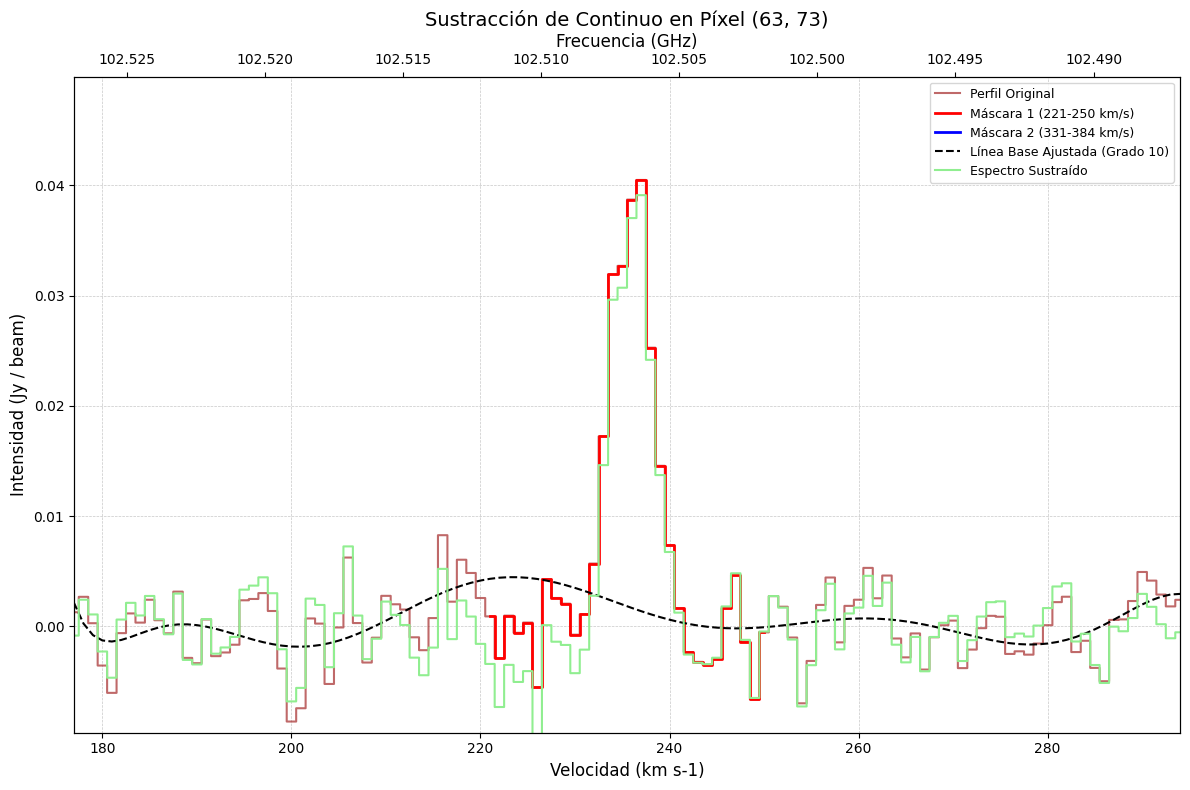


RMS de residuales (puntos ajustados al continuo) para el píxel de ploteo (63, 73): 0.00277 Jy / beam
3-sigma de residuales (puntos ajustados al continuo) para el píxel de ploteo (63, 73): 8.3122e-03 Jy / beam


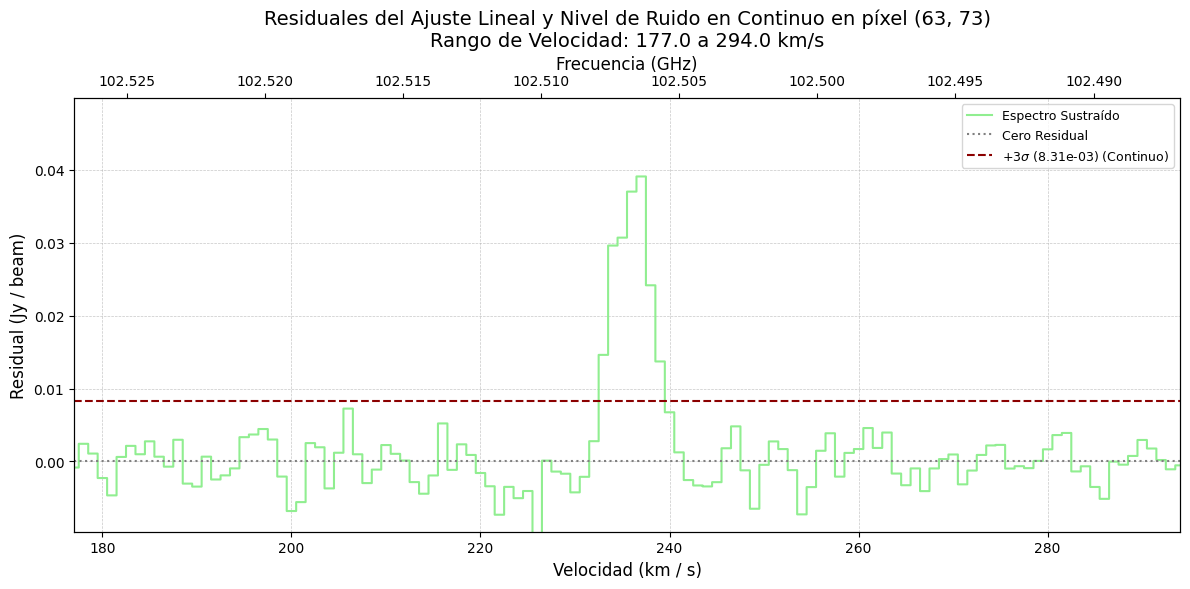


Calculando y ploteando el mapa de RMS del ruido del continuo y el histograma para todo el cubo...


In [329]:
# You can change these (x_plot, y_plot) coordinates to any pixel you want to inspect
x_plot = 63
y_plot = 73

if x_plot < nx and y_plot < ny:
    print(f"\nGenerando gráficos para el píxel de verificación ({x_plot}, {y_plot})...")
    intensity_original_plot = cube[:, y_plot, x_plot].value
    intensity_subtracted_plot = continuum_subtracted_cube[:, y_plot, x_plot].value

    # Recalculate the fitted line for this specific pixel for plotting purposes
    velocities_to_fit_plot, intensities_to_fit_plot, velocities_fit_range_all_plot, intensities_fit_range_all_plot = \
        create_mask_and_subcube_for_fitting(VEL, intensity_original_plot, mask_ranges_km_s, fit_range_km_s)

    fitted_line_plot = np.full_like(VEL.value, np.nan)
    poly_coeff_plot = None # Initialize poly_coeff_plot
    if intensities_to_fit_plot.size > order:
        try:
            poly_coeff_plot = np.polyfit(velocities_to_fit_plot.value, intensities_to_fit_plot, deg=order)
            fitted_line_plot = np.polyval(poly_coeff_plot, VEL.value)
        except Exception as e:
            print(f"Error al recalcular ajuste para el píxel de ploteo ({x_plot}, {y_plot}): {e}")

    # --- Plotting: Original, Fitted Continuum, and Subtracted Spectrum ---
    plt.figure(figsize=(12, 8))

    # Plot original intensity profile
    plt.step(VEL.value, intensity_original_plot, where='mid', label='Perfil Original', color='brown', linestyle='-', alpha=0.7)

    # Plot the masked regions (lines excluded from fit)
    colors = ['red', 'blue', 'green', 'purple'] # Cycle through colors for masks
    for i, (v_min, v_max) in enumerate(mask_ranges_km_s):
        mask_plot_range = (VEL >= v_min * u.km/u.s) & (VEL <= v_max * u.km/u.s)
        plt.step(VEL[mask_plot_range].value, intensity_original_plot[mask_plot_range],
                 where='mid', label=f'Máscara {i+1} ({v_min}-{v_max} km/s)',
                 color=colors[i % len(colors)], linewidth=2)

    # Plot the fitted continuum line
    plt.plot(VEL.value, fitted_line_plot, label=f'Línea Base Ajustada (Grado {order})', color='black', linestyle='--', linewidth=1.5)

    # Plot the continuum-subtracted spectrum (residuals)
    plt.step(VEL.value, intensity_subtracted_plot, where='mid', label='Espectro Sustraído', color='lightgreen', linewidth=1.5)

    plt.xlabel(f'Velocidad ({UNIT})', fontsize=12)
    plt.ylabel(f'Intensidad ({cube.unit})', fontsize=12)
    plt.title(f'Sustracción de Continuo en Píxel ({x_plot}, {y_plot})', fontsize=14)
    plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
    plt.legend(loc='best', fontsize=9)

    # Set x-limits for better visualization, based on the fit range
    vel_min_plot_lim, vel_max_plot_lim = fit_range_km_s[0][0] * u.km/u.s, fit_range_km_s[0][1] * u.km/u.s
    plt.xlim(vel_min_plot_lim.value, vel_max_plot_lim.value)

    # Set Y-axis limits based on original intensity
    if not np.all(np.isnan(intensity_original_plot)):
        plt.ylim(np.nanmin(intensity_original_plot) * 0.9, np.nanmax(intensity_original_plot) * 1.1)
    else:
        # Fallback if original intensity is all NaNs
        plt.ylim(-0.1, 0.1) # A small default range if data is missing


    # Add a second x-axis for frequency at the top
    ax2 = plt.gca().twiny()
    # Calculate corresponding frequencies for the velocity limits
    freq_for_vel_max_plot = RESTFRQ * (1 - vel_max_plot_lim / C)
    freq_for_vel_min_plot = RESTFRQ * (1 - vel_min_plot_lim / C)
    ax2.set_xlim(freq_for_vel_min_plot.value, freq_for_vel_max_plot.value)
    ax2.set_xlabel(f'Frecuencia ({RESTFRQ.unit})', fontsize=12)

    plt.tight_layout()
    plt.show()

    # --- Plotting: Residuals and RMS (for the plotted pixel) ---
    # Calculate RMS from the residuals *only from the points used for fitting* (continuum-only)
    if poly_coeff_plot is not None and intensities_to_fit_plot.size > 0:
        residuals_fitted_points_plot = intensities_to_fit_plot - np.polyval(poly_coeff_plot, velocities_to_fit_plot.value)
        
        if residuals_fitted_points_plot.size > 0:
            rms_plot = np.sqrt(np.mean(residuals_fitted_points_plot**2))
            sigma_plot = 3 * rms_plot # 3-sigma level
            print(f"\nRMS de residuales (puntos ajustados al continuo) para el píxel de ploteo ({x_plot}, {y_plot}): {rms_plot:.5f} {cube.unit}")
            print(f"3-sigma de residuales (puntos ajustados al continuo) para el píxel de ploteo ({x_plot}, {y_plot}): {sigma_plot:.4e} {cube.unit}")

            plt.figure(figsize=(12, 6))
            # Plot the full continuum-subtracted spectrum (which includes lines)
            plt.step(VEL.value, intensity_subtracted_plot, where='mid', label='Espectro Sustraído', color='lightgreen', linewidth=1.5)
            plt.axhline(0, color='grey', linestyle=':', linewidth=1.5, label='Cero Residual')
            
            if not np.isnan(sigma_plot):
                plt.axhline(sigma_plot, color='darkred', linestyle='--', linewidth=1.5, label=f'+3$\\sigma$ ({sigma_plot:.2e}) (Continuo)')
                

            plt.xlabel(f'Velocidad ({u.km/u.s})', fontsize=12)
            plt.ylabel(f'Residual ({cube.unit})', fontsize=12)
            plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
            plt.legend(loc='best', fontsize=9)
            plt.title(f'Residuales del Ajuste Lineal y Nivel de Ruido en Continuo en píxel ({x_plot}, {y_plot})\nRango de Velocidad: {fit_range_km_s[0][0]} a {fit_range_km_s[0][1]} km/s', fontsize=14)

            plt.xlim(vel_min_plot_lim.value, vel_max_plot_lim.value)

            # Set Y-axis limits based on original intensity
            if not np.all(np.isnan(intensity_original_plot)):
                plt.ylim(np.nanmin(intensity_original_plot) * 0.9, np.nanmax(intensity_original_plot) * 1.1)
            else:
                # Fallback if original intensity is all NaNs
                plt.ylim(-0.1, 0.1) # A small default range if data is missing

            # Add a second x-axis for frequency at the top for the residuals plot
            ax2_res = plt.gca().twiny()
            ax2_res.set_xlim(freq_for_vel_min_plot.value, freq_for_vel_max_plot.value)
            ax2_res.set_xlabel(f'Frecuencia ({RESTFRQ.unit})', fontsize=12)
            
            plt.tight_layout()
            plt.show()
        else:
            print(f"No hay residuales válidos para calcular RMS del continuo en el píxel de ploteo ({x_plot}, {y_plot}).")
    else:
        print(f"No se pudo calcular el RMS del continuo para el píxel de ploteo ({x_plot}, {y_plot}) debido a la falta de ajuste o datos.")
else:
    print(f"El píxel de ploteo de verificación ({x_plot}, {y_plot}) está fuera de los límites del cubo.")

# --- New Section: Global RMS Map and Histogram ---
print("\nCalculando y ploteando el mapa de RMS del ruido del continuo y el histograma para todo el cubo...")


### Uncertainty
To quantify the uncertainty into spectrum we using the Root mean square (RMS) noise (fluctuation level) is the total(average) noise level in the image which could be caused by antenna electronics as well as confusion. In general, it seems to be a noise(fluctuations) with gaussian distribution and so RMS noise seems to be synonimous to the standard deviation of that distribution. Lower noise means better interferometer sensitivity because it can detect fainter sources with lower noise. (ref: http://astro.vaporia.com/start/rms.html, https://en.wikipedia.org/wiki/Root_mean_square_deviation)

The RMS take the form: $ RMS = \sqrt{\frac{1}{N}\sum\limits^{N}_{i=1}({x_i}-{\={x}})^2} = \sigma $

where: 

- N is the count
- $ x_i $ are the values
- $ \={x} $ is the media values
in this case  the median isnt zero, can calculate the standar deviation (\sigma)

We know that to transform to FWHM to sigma, we have a conversion factor given by: 
$$ FWHM = \sigma \sqrt{8ln2} $$

(this is theorical/mathematical part)


Calculando y ploteando el mapa de RMS del ruido del continuo y el histograma para todo el cubo...


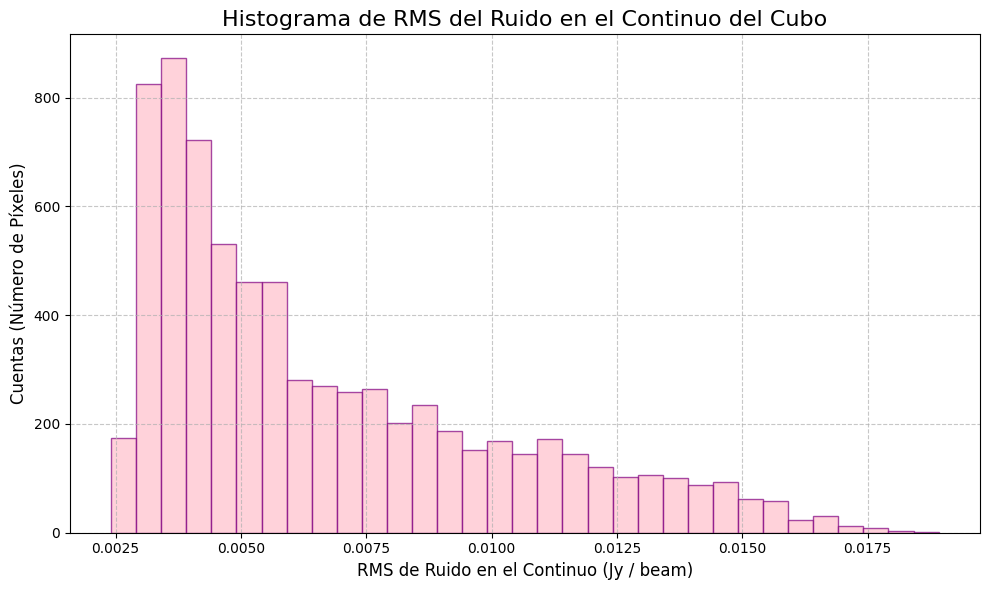

In [318]:

# --- RMS Histogram ---
print("\nCalculando y ploteando el mapa de RMS del ruido del continuo y el histograma para todo el cubo...")

# The rms_map_continuum_only is already calculated within the main processing loop

# --- Plotting: RMS Histogram ---
plt.figure(figsize=(10, 6))
# Flatten the rms_map_continuum_only and remove NaNs before plotting the histogram
rms_values_flat_continuum = rms_map_continuum_only[~np.isnan(rms_map_continuum_only)].flatten()

if rms_values_flat_continuum.size > 0:
    plt.hist(rms_values_flat_continuum, bins='auto', color='pink', edgecolor='purple', alpha=0.7)
    plt.xlabel(f'RMS de Ruido en el Continuo ({cube.unit})', fontsize=12)
    plt.ylabel('Cuentas (Número de Píxeles)', fontsize=12)
    plt.title('Histograma de RMS del Ruido en el Continuo del Cubo', fontsize=16)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
else:
    print("No hay valores RMS válidos del continuo para generar el histograma.")




Parámetros del ajuste Gaussiano al histograma de RMS:
  Amplitud: 7.378e+02
  Media: -8.681e-04 Jy / beam
  Desviación Estándar: 4.513e-03 Jy / beam


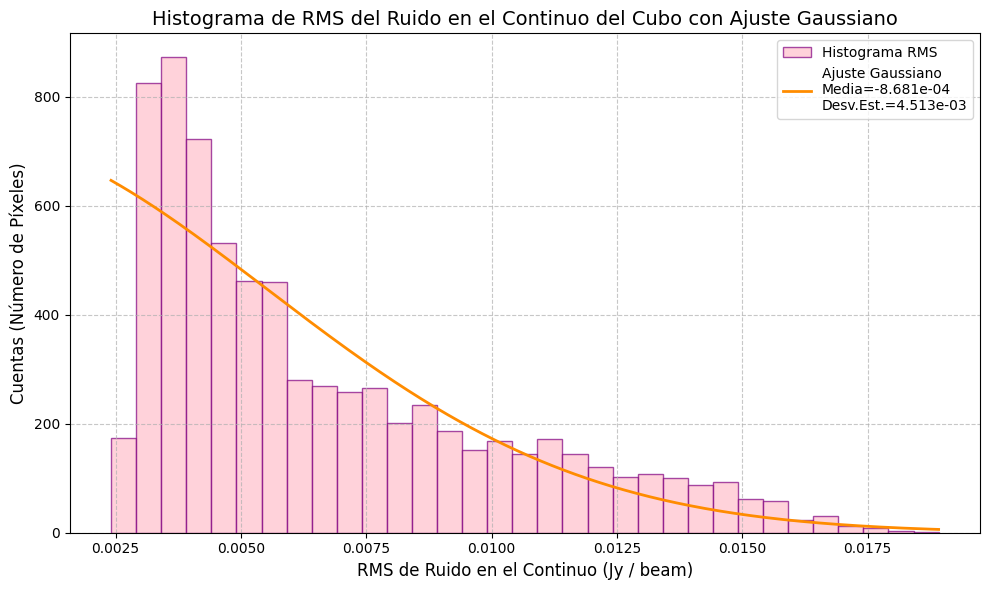

In [325]:
from scipy.optimize import curve_fit
plt.figure(figsize=(10, 6))
# Flatten the rms_map_continuum_only and remove NaNs before plotting the histogram
rms_values_flat_continuum = rms_map_continuum_only[~np.isnan(rms_map_continuum_only)].flatten()

if rms_values_flat_continuum.size > 0:
    # Plot the histogram
    counts, bin_edges, _ = plt.hist(rms_values_flat_continuum, bins='auto', color='pink', edgecolor='purple', alpha=0.7, label='Histograma RMS')
    
    # Define Gaussian function for fitting
    def gaussian(x, amplitude, mean, stddev):
        return amplitude * np.exp(-((x - mean) / (2 * stddev))**2)

    # Get bin centers for fitting
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

    # Initial guess for the parameters [amplitude, mean, stddev]
    # Amplitude: Max count in histogram
    # Mean: Median of the RMS values
    # Stddev: Standard deviation of the RMS values
    initial_amplitude = counts.max()
    initial_mean = np.mean(rms_values_flat_continuum)
    initial_stddev = np.std(rms_values_flat_continuum)

    try:
        # Fit the Gaussian curve to the histogram data
        popt, pcov = curve_fit(gaussian, bin_centers, counts, p0=[initial_amplitude, initial_mean, initial_stddev])
        
        # Extract fitted parameters
        amplitude_fit, mean_fit, stddev_fit = popt
        
        # Generate points for the fitted Gaussian curve
        x_fit = np.linspace(bin_edges.min(), bin_edges.max(), 500)
        y_fit = gaussian(x_fit, amplitude_fit, mean_fit, stddev_fit)
        
        # Plot the fitted Gaussian curve
        plt.plot(x_fit, y_fit, color='darkorange', linewidth=2, label=f'Ajuste Gaussiano\nMedia={mean_fit:.3e}\nDesv.Est.={stddev_fit:.3e}')
        
        print(f"\nParámetros del ajuste Gaussiano al histograma de RMS:")
        print(f"  Amplitud: {amplitude_fit:.3e}")
        print(f"  Media: {mean_fit:.3e} {cube.unit}")
        print(f"  Desviación Estándar: {stddev_fit:.3e} {cube.unit}")

    except RuntimeError:
        print("Advertencia: No se pudo ajustar la curva Gaussiana al histograma de RMS.")
    except ValueError as e:
        print(f"Advertencia: Error al intentar ajustar la curva Gaussiana: {e}")

    plt.xlabel(f'RMS de Ruido en el Continuo ({cube.unit})', fontsize=12)
    plt.ylabel('Cuentas (Número de Píxeles)', fontsize=12)
    plt.title('Histograma de RMS del Ruido en el Continuo del Cubo con Ajuste Gaussiano', fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend(loc='best', fontsize=10)
    plt.tight_layout()
    plt.show()
else:
    print("No hay valores RMS válidos del continuo para generar el histograma.")

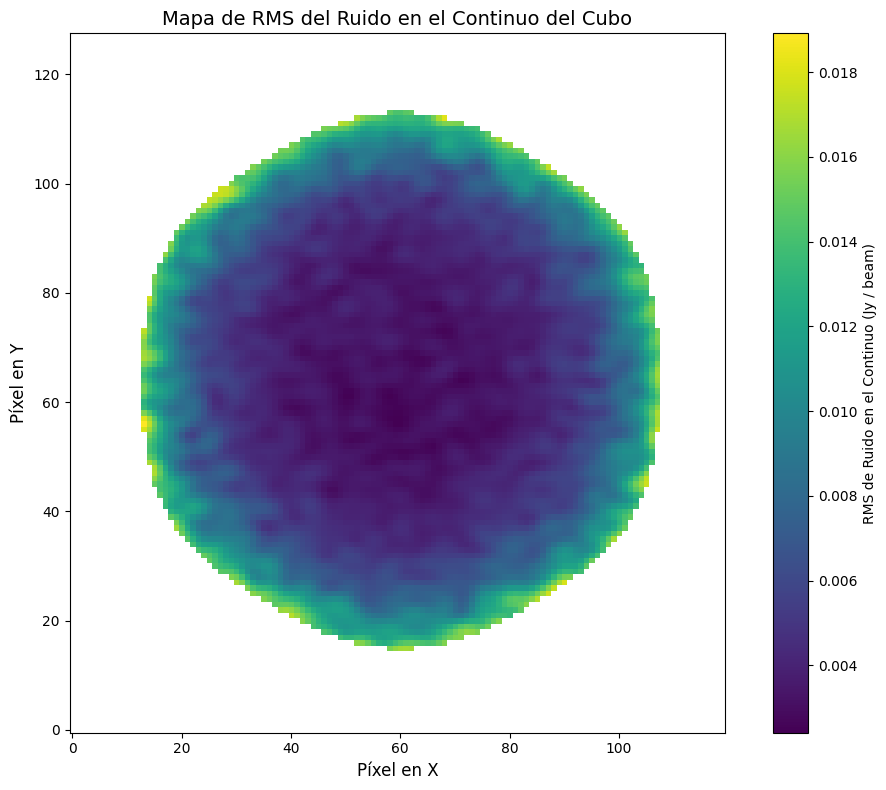


Análisis global de RMS del ruido del continuo completado.


In [320]:

# --- Plotting: RMS Map ---
plt.figure(figsize=(10, 8))
# Use imshow to display the 2D RMS map of continuum noise
# Orient the map correctly based on FITS conventions (origin='lower' if Y-axis increases upwards)
# extent parameter can be used to set the coordinates if desired
plt.imshow(rms_map_continuum_only, origin='lower', cmap='viridis', interpolation='nearest') # 'viridis' is a good default colormap
plt.colorbar(label=f'RMS de Ruido en el Continuo ({cube.unit})')
plt.xlabel('Píxel en X', fontsize=12)
plt.ylabel('Píxel en Y', fontsize=12)
plt.title('Mapa de RMS del Ruido en el Continuo del Cubo', fontsize=14)
plt.tight_layout()
plt.show()

print("\nAnálisis global de RMS del ruido del continuo completado.")


C:\Users\macka\AppData\Local\Temp\ipykernel_4884\1179116984.py:1: RuntimeWarning: Mean of empty slice
  continuum_subtracted_mean_map = np.nanmean(continuum_subtracted_cube, axis=0)


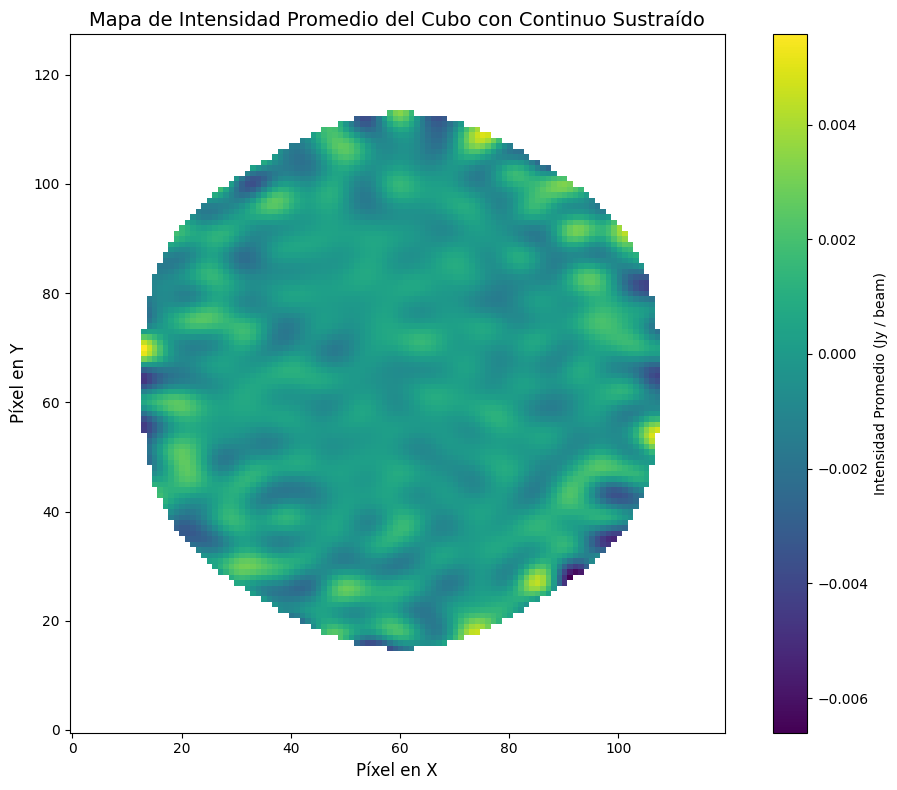


Mapa de intensidad promedio del cubo con continuo sustraído generado.


In [321]:
continuum_subtracted_mean_map = np.nanmean(continuum_subtracted_cube, axis=0)

plt.figure(figsize=(10, 8))
plt.imshow(continuum_subtracted_mean_map, origin='lower', cmap='viridis', interpolation='nearest') # 'plasma' is a good colormap for intensity
plt.colorbar(label=f'Intensidad Promedio ({cube.unit})')
plt.xlabel('Píxel en X', fontsize=12)
plt.ylabel('Píxel en Y', fontsize=12)
plt.title('Mapa de Intensidad Promedio del Cubo con Continuo Sustraído', fontsize=14)
plt.tight_layout()
plt.show()

print("\nMapa de intensidad promedio del cubo con continuo sustraído generado.")




C:\Users\macka\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\spectral_cube\spectral_cube.py:436: RuntimeWarning: All-NaN slice encountered
  out = function(self._get_filled_data(fill=fill,


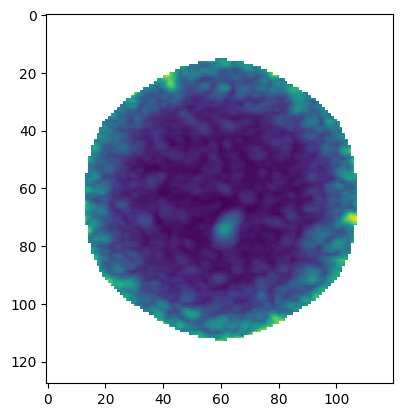

In [322]:
continuum_subtracted = continuum_subtracted_cube.max(axis=0)
continuum_subtracted.quicklook()

In [324]:
# Define the output filename for the new FITS cube
output_file = 'C:/Users/macka/OneDrive/Documentos/Master/PYTHON_CODES/RESULTS/FITS/continuum_subtracted_cube.fits'

# Write the new cube to a FITS file, overwriting if it already exists
#try:
    continuum_subtracted_cube.write(output_file, overwrite=True)
    print(f"\n¡Proceso completado! El cubo con el continuo sustraído se ha guardado en: {output_file}")
except Exception as e:
    print(f"Error al guardar el cubo FITS: {e}")

IndentationError: unexpected indent (4141219369.py, line 6)